In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.path.exists("/content/drive/MyDrive/ІТСС/data/variant_3.csv"))

True


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/ІТСС/data_r/variant_3.csv")

In [ ]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  26 

columns:  ['Unnamed: 0', 'Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed', 'ColorName_x', 'ColorName_y', 'ColorName', 'BreedName_x', 'BreedName_y', 'StateName_x']


In [ ]:
print('Samples count: ',ds.shape[0])
display(ds.head(10))

Samples count:  1356


,Unnamed: 0,Type,Name,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,...,Description,PetID,PhotoAmt,AdoptionSpeed,ColorName_x,ColorName_y,ColorName,BreedName_x,BreedName_y,StateName_x
0,0,2,Golden Tabby Girl,1,2.0,NaN,1,2,1,2,...,A cute tabby kitten looking for new home. She ...,dae13a47e,7.0,1,Brown,Golden,NaN,Tabby,Domestic Short Hair,Selangor
1,1,2,Ogen & Oyen,2,3.0,1.0,2,2,2,2,...,Ogen (male) & Oyen (female) are about 2 months...,718b14a08,2.0,1,Brown,Golden,Cream,Domestic Medium Hair,Domestic Short Hair,Selangor
2,2,2,Noah And Nellie,2,3.0,1.0,1,1,1,2,...,"Once again, thanks to petfinder, Noah and Nell...",4a590a1cc,5.0,1,Brown,Golden,Cream,Tabby,Tabby,Selangor
3,3,2,Money,1,2.0,1.0,1,3,3,3,...,Please adopt this cute little kitten... I eant...,19982272a,4.0,4,Brown,Golden,Cream,Domestic Short Hair,Domestic Medium Hair,Selangor
4,4,1,Karlo,2,1.0,2.0,2,2,2,2,...,"Meet Karlo, brother of little Karla, the cutes...",f61c4cead,1.0,3,Brown,Golden,Cream,Mixed Breed,Mixed Breed,Selangor
5,5,1,Puppy,2,1.0,1.0,1,2,2,3,...,Those puppies at damansara. all puppis are mal...,8cf927527,1.0,3,Brown,Golden,Cream,Mixed Breed,Mixed Breed,Selangor
6,6,1,Lola,2,2.0,2.0,1,3,1,1,...,"""Lola"" Friendly, petite sized dog available fo...",030f32f08,3.0,4,Brown,Golden,Cream,Mixed Breed,Mixed Breed,Selangor
7,7,1,Peanut,2,2.0,2.0,1,3,3,3,...,Friendly and bubbly little pup . Seems pretty ...,8019d0c63,3.0,4,Brown,Golden,Cream,Mixed Breed,Mixed Breed,Selangor
8,8,1,Honey,12,2.0,2.0,2,2,2,2,...,Original owner had a few puppies and was not a...,f5fc7d4a5,1.0,4,Brown,Golden,Cream,Terrier,Mixed Breed,Selangor
9,9,1,Naari,36,2.0,2.0,3,1,1,1,...,Naari is the sweetest girl who walked the eart...,1a54d4e92,3.0,3,Brown,Golden,Cream,Terrier,Terrier,Selangor


In [ ]:
#пропущені дані в датасеті
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [ ]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  Name
Missing data in  Gender
Missing data in  MaturitySize
Missing data in  ColorName
Missing data in  BreedName_x
Missing data in  BreedName_y


In [ ]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Name 112
Gender 67
MaturitySize 135
ColorName 207
BreedName_x 148
BreedName_y 135


In [ ]:
##унікальні значення
ds.nunique()

Unnamed: 0       1356
Type                2
Name             1147
Age                51
Gender              3
MaturitySize        4
FurLength           3
Vaccinated          3
Dewormed            3
Sterilized          3
Health              3
Quantity           13
Fee                28
State              12
RescuerID         819
VideoAmt            8
Description      1323
PetID            1356
PhotoAmt           30
AdoptionSpeed       5
ColorName_x         5
ColorName_y         5
ColorName           5
BreedName_x        94
BreedName_y        86
StateName_x        12
dtype: int64

In [ ]:
#описова статистика
ds.describe()

,Unnamed: 0,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,1356.000000,1356.000000,1356.000000,1289.000000,1221.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,677.500000,1.561209,8.957227,2.103181,1.868141,1.595133,1.763274,1.564159,1.943215,1.025074,2.263274,19.773599,41345.241888,0.078171,4.691003,2.470501
std,391.587793,0.496422,16.456305,0.746252,0.533908,0.636369,0.622464,0.667328,0.558482,0.169974,2.046509,59.673908,32.035366,0.481169,4.000879,1.213035
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,338.750000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,1.000000
50%,677.500000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,4.000000,2.000000
75%,1016.250000,2.000000,8.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,0.000000,41346.750000,0.000000,5.000000,4.000000
max,1355.000000,2.000000,212.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,750.000000,41401.000000,8.000000,30.000000,4.000000


In [ ]:
#типи даних в датасеті
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1356 non-null   int64  
 1   Type           1356 non-null   int64  
 2   Name           1244 non-null   object 
 3   Age            1356 non-null   int64  
 4   Gender         1289 non-null   float64
 5   MaturitySize   1221 non-null   float64
 6   FurLength      1356 non-null   int64  
 7   Vaccinated     1356 non-null   int64  
 8   Dewormed       1356 non-null   int64  
 9   Sterilized     1356 non-null   int64  
 10  Health         1356 non-null   int64  
 11  Quantity       1356 non-null   int64  
 12  Fee            1356 non-null   int64  
 13  State          1356 non-null   int64  
 14  RescuerID      1356 non-null   object 
 15  VideoAmt       1356 non-null   int64  
 16  Description    1356 non-null   object 
 17  PetID          1356 non-null   object 
 18  PhotoAmt

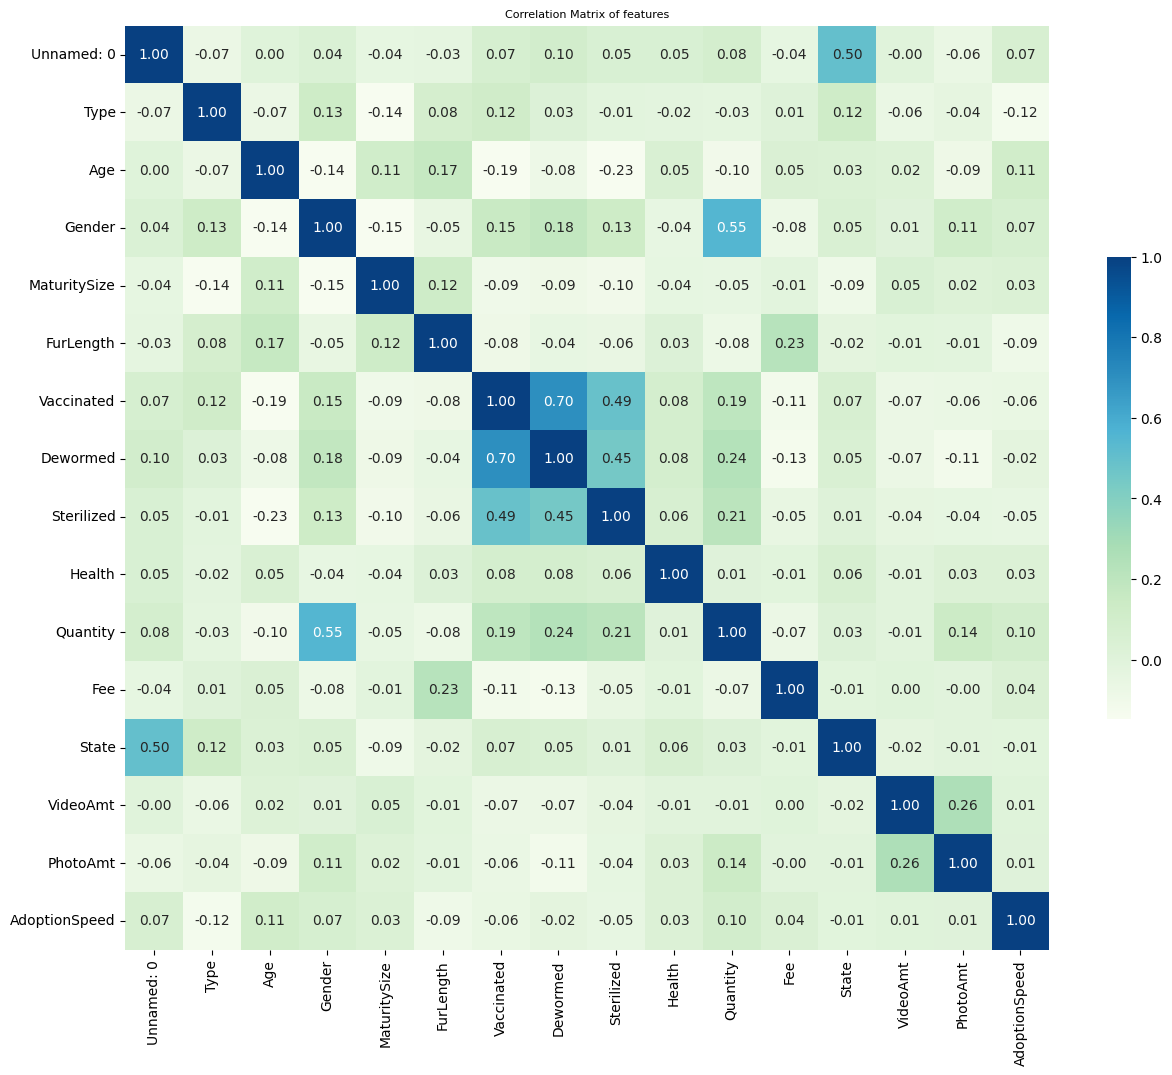

In [ ]:
#Кореляційна матриця між числовими ознаками для визначення можливих залежностей
cols_to_corr = ds.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[cols_to_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

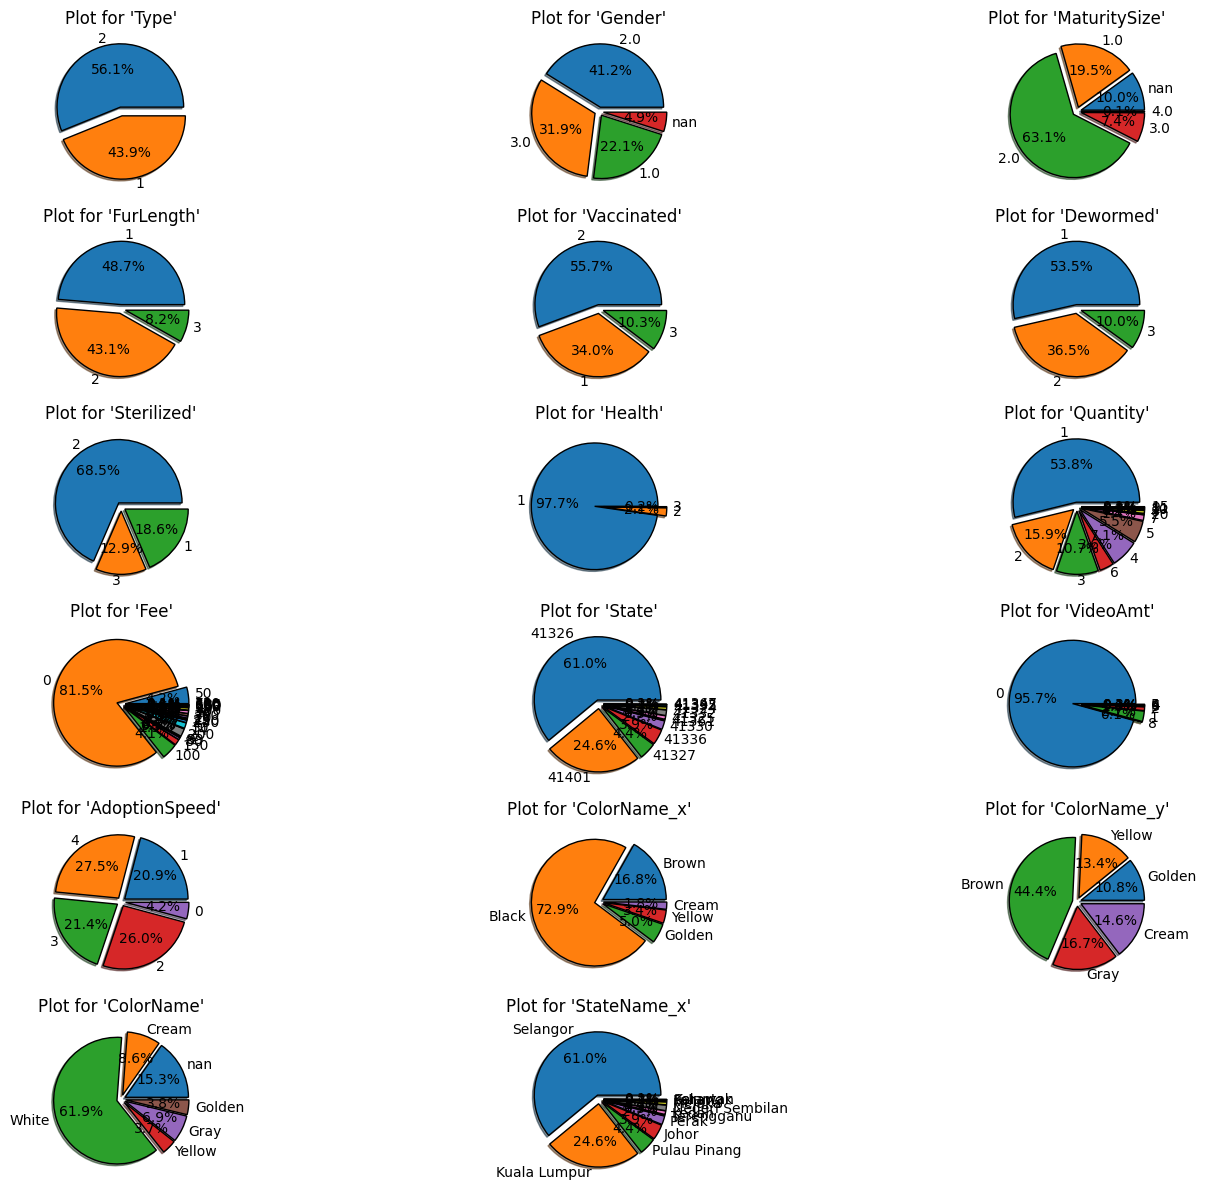

In [ ]:
categorical_columns= ds[[col for col in ds.columns if ds[col].nunique() < 30]]
len(categorical_columns)
for i, col in enumerate(categorical_columns):
    plt.subplot(6, 3, i + 1)
    plt.rcParams["figure.figsize"] = (30, 30)
    labels = ds[col].astype('str').unique().tolist()
    slices = [ds[col].astype('str').value_counts()[i] for i in labels]
    plt.pie(slices, labels=labels, explode=[0.07 for i in range(len(labels))],
            wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
    plt.title(f"Plot for \'{col}\'")
    plt.tight_layout()
plt.show()

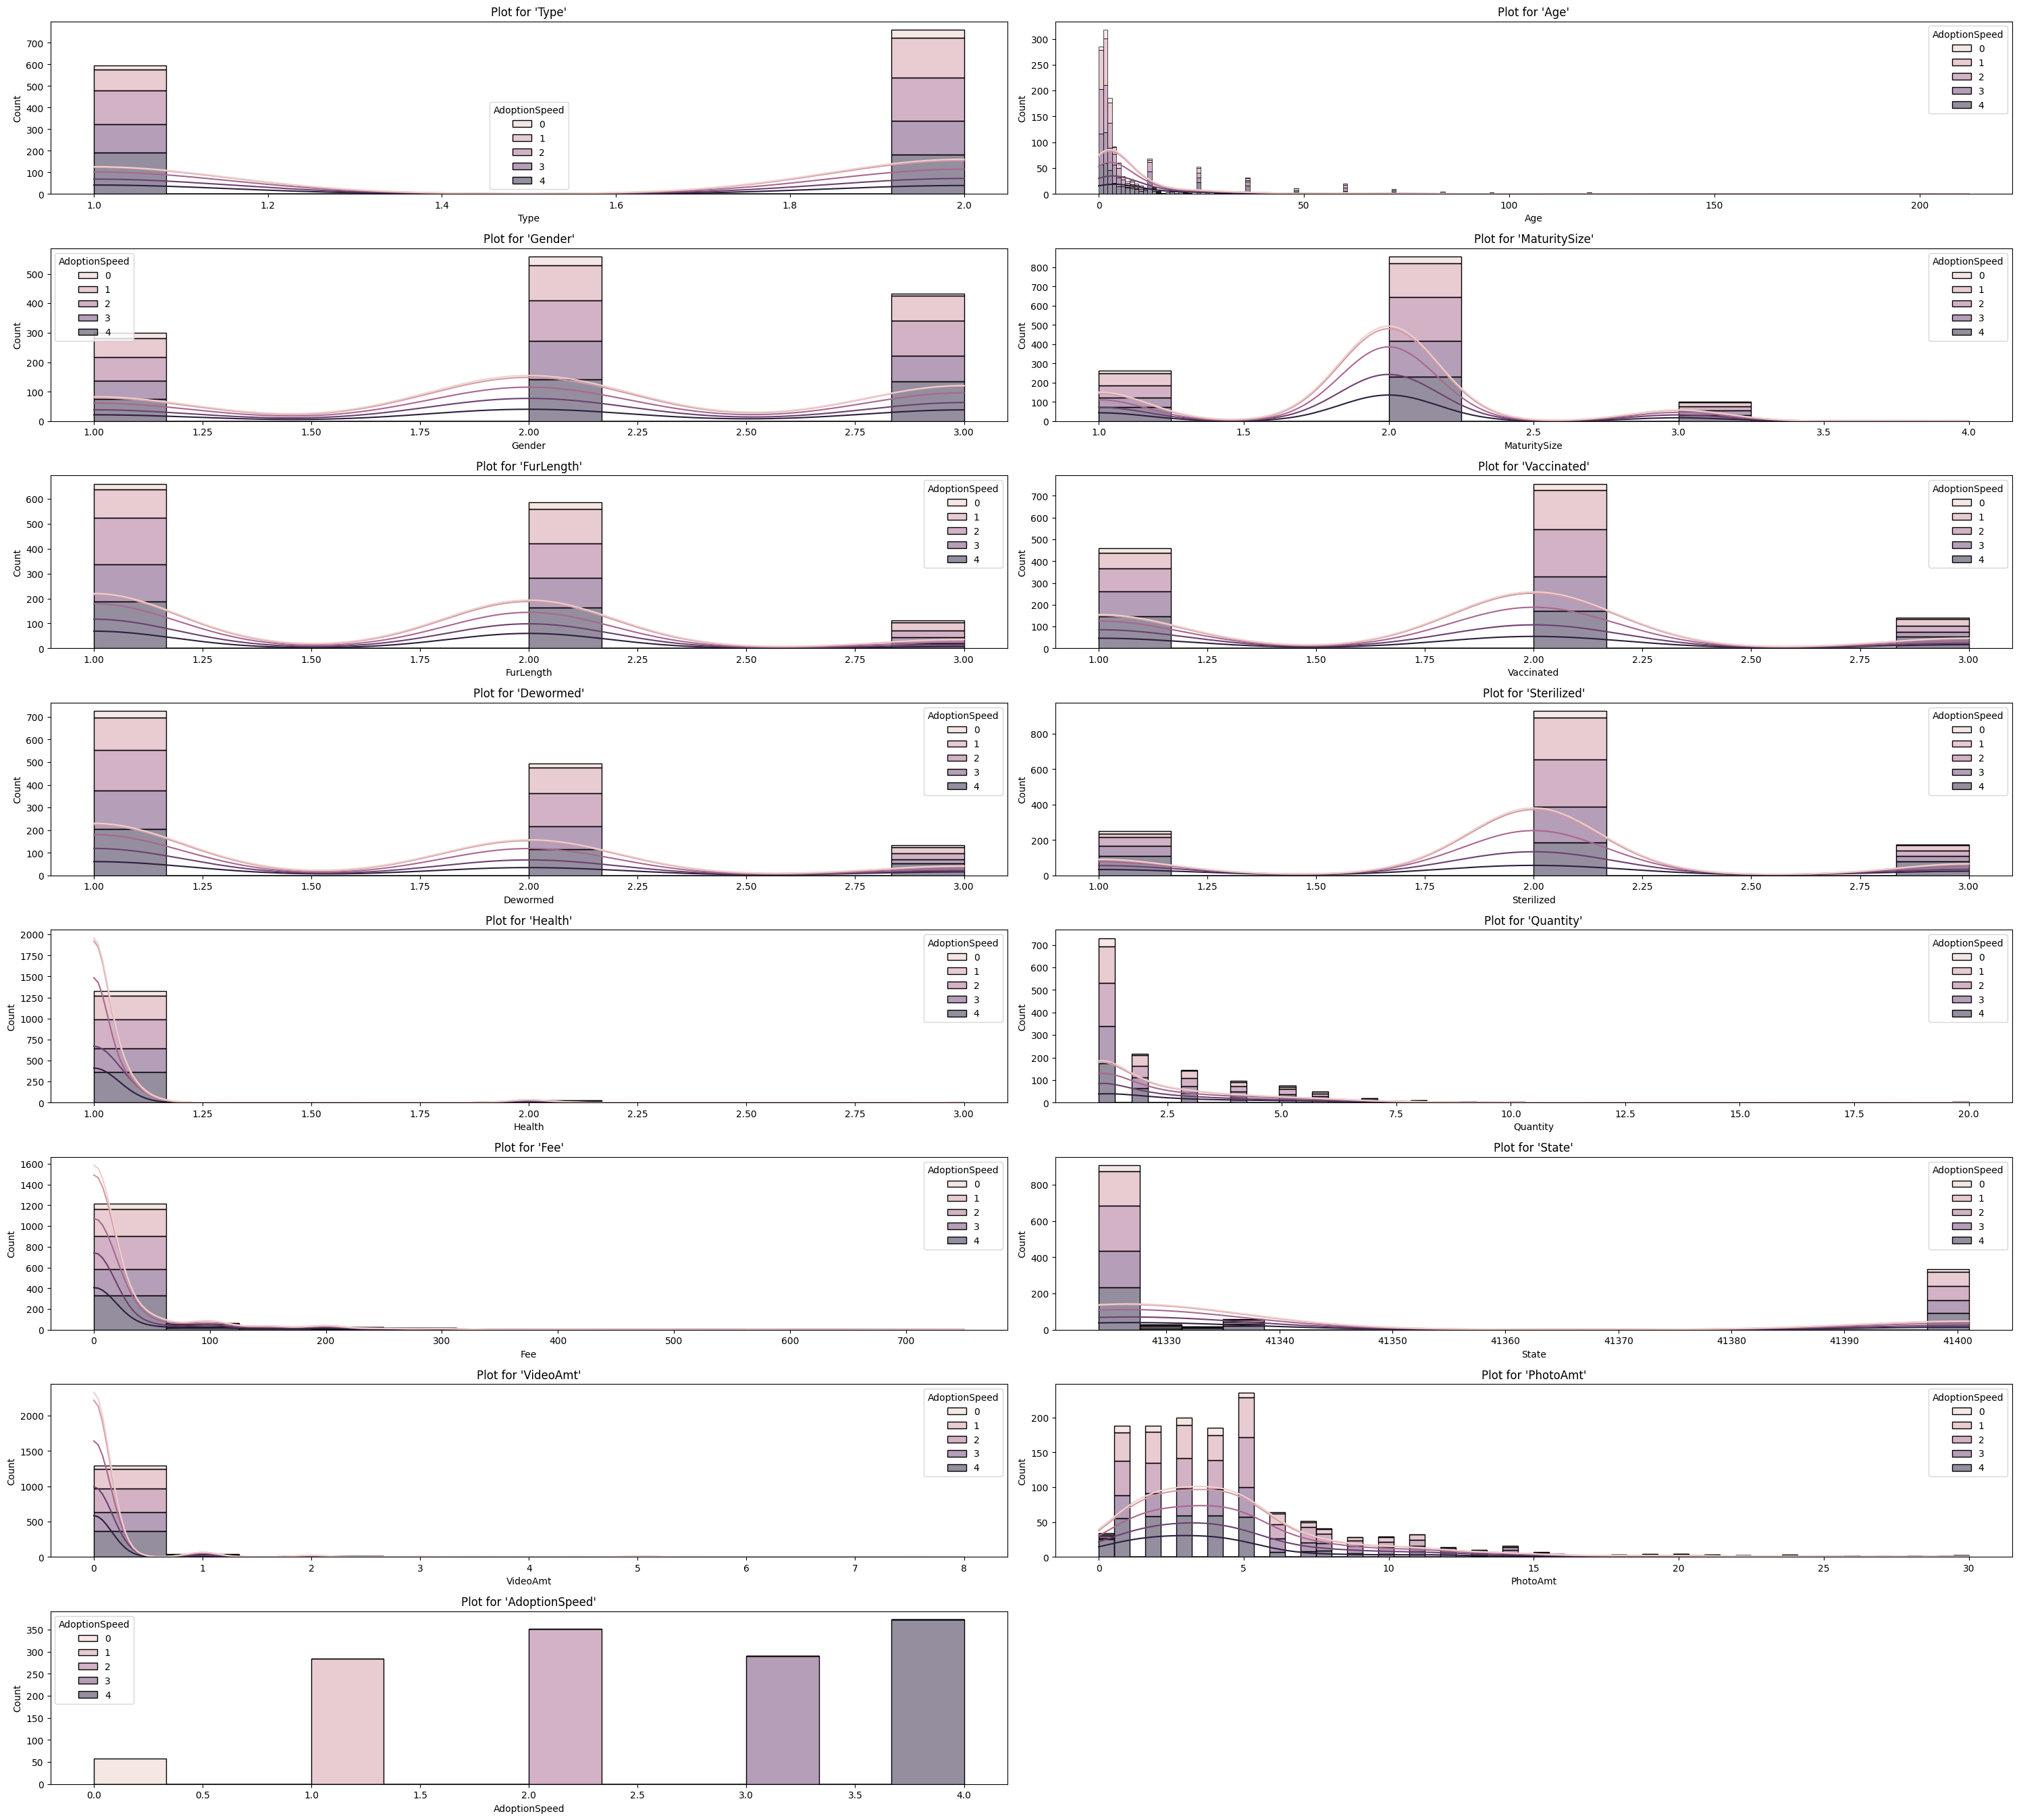

In [ ]:
# п
numerical_columns = ds.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Unnamed: 0')
len(numerical_columns)
for i, col in enumerate(numerical_columns):
    plt.subplot(9, 2, i + 1)
    plt.rcParams["figure.figsize"] = (14, 8)
    sns.histplot(data=ds, x=col, kde=True, hue='AdoptionSpeed', multiple="stack")
    plt.title(f"Plot for \'{col}\'")
    plt.tight_layout()
plt.show()